In [822]:
## Import all the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant
from sklearn.metrics import r2_score, mean_squared_error

In [823]:
#Set max rows and max width limit
pd.set_option('display.max_rows', 38000)
pd.set_option('max_colwidth', 150)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 150]


In [824]:
# Read the Dataset
data = pd.read_csv("train.csv")

In [825]:
data.shape

(1460, 81)

In [826]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [827]:
# Check Null values using data.info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [828]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [829]:
# Remove those columns which has very high missing values
# Alley, PoolQC, Fence, MiscFeature

In [830]:
columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
data.drop(columns, axis = 1, inplace = True)
data.drop('Id', axis = 1, inplace = True) ## No need Id column

In [831]:
# Now we can fill null values which still present

In [832]:
# list of columns present null values
data.columns[data.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [833]:
# Fill null values with mean and mode 

data['MasVnrType'] = np.where(data['MasVnrType'].isna(), data['MasVnrType'].mode(), data['MasVnrType'])
data['BsmtQual'] = np.where(data['BsmtQual'].isna(), data['BsmtQual'].mode(), data['BsmtQual'])
data['BsmtCond'] = np.where(data['BsmtCond'].isna(), data['BsmtCond'].mode(), data['BsmtCond'])
data['BsmtExposure'] = np.where(data['BsmtExposure'].isna(), data['BsmtExposure'].mode(), data['BsmtExposure'])
data['BsmtFinType1'] = np.where(data['BsmtFinType1'].isna(), data['BsmtFinType1'].mode(), data['BsmtFinType1'])
data['BsmtFinType2'] = np.where(data['BsmtFinType2'].isna(), data['BsmtFinType2'].mode(), data['BsmtFinType2'])
data['Electrical'] = np.where(data['Electrical'].isna(), data['Electrical'].mode(), data['Electrical'])
data['GarageType'] = np.where(data['GarageType'].isna(), data['GarageType'].mode(), data['GarageType'])
data['GarageFinish'] = np.where(data['GarageFinish'].isna(), data['GarageFinish'].mode(), data['GarageFinish'])
data['GarageQual'] = np.where(data['GarageQual'].isna(), data['GarageQual'].mode(), data['GarageQual'])
data['GarageCond'] = np.where(data['GarageCond'].isna(), data['GarageCond'].mode(), data['GarageCond'])
data['FireplaceQu'] = np.where(data['FireplaceQu'].isna(), data['FireplaceQu'].mode(), data['FireplaceQu'])

data['GarageYrBlt'] = np.where(data['GarageYrBlt'].isna(), data['GarageYrBlt'].mean(), data['GarageYrBlt'])
data['MasVnrArea'] = np.where(data['MasVnrArea'].isna(), data['MasVnrArea'].mean(), data['MasVnrArea'])
data['LotFrontage'] = np.where(data['LotFrontage'].isna(), data['LotFrontage'].mean(), data['LotFrontage'])


In [834]:
data.isnull().sum().any()

False

In [835]:
# Now we don't have any null values present

In [836]:
# Convert categorical feature into Object Datatype
data['MSSubClass'] = data['MSSubClass'].astype(str)
data['OverallQual'] = data['OverallQual'].astype(str)
data['OverallCond'] = data['OverallCond'].astype(str)

In [837]:
# Seperate the columns
num_cols = list(data.select_dtypes(include=['int', 'float']).columns)
str_cols = list(data.select_dtypes(include=['object']).columns)

In [838]:
print("No. of int/float columns present in dataset : {}".format(len(num_cols)))
print("No. of string columns present in dataset : {}".format(len(str_cols)))

No. of int/float columns present in dataset : 34
No. of string columns present in dataset : 42


In [839]:
# Working on categorical data first

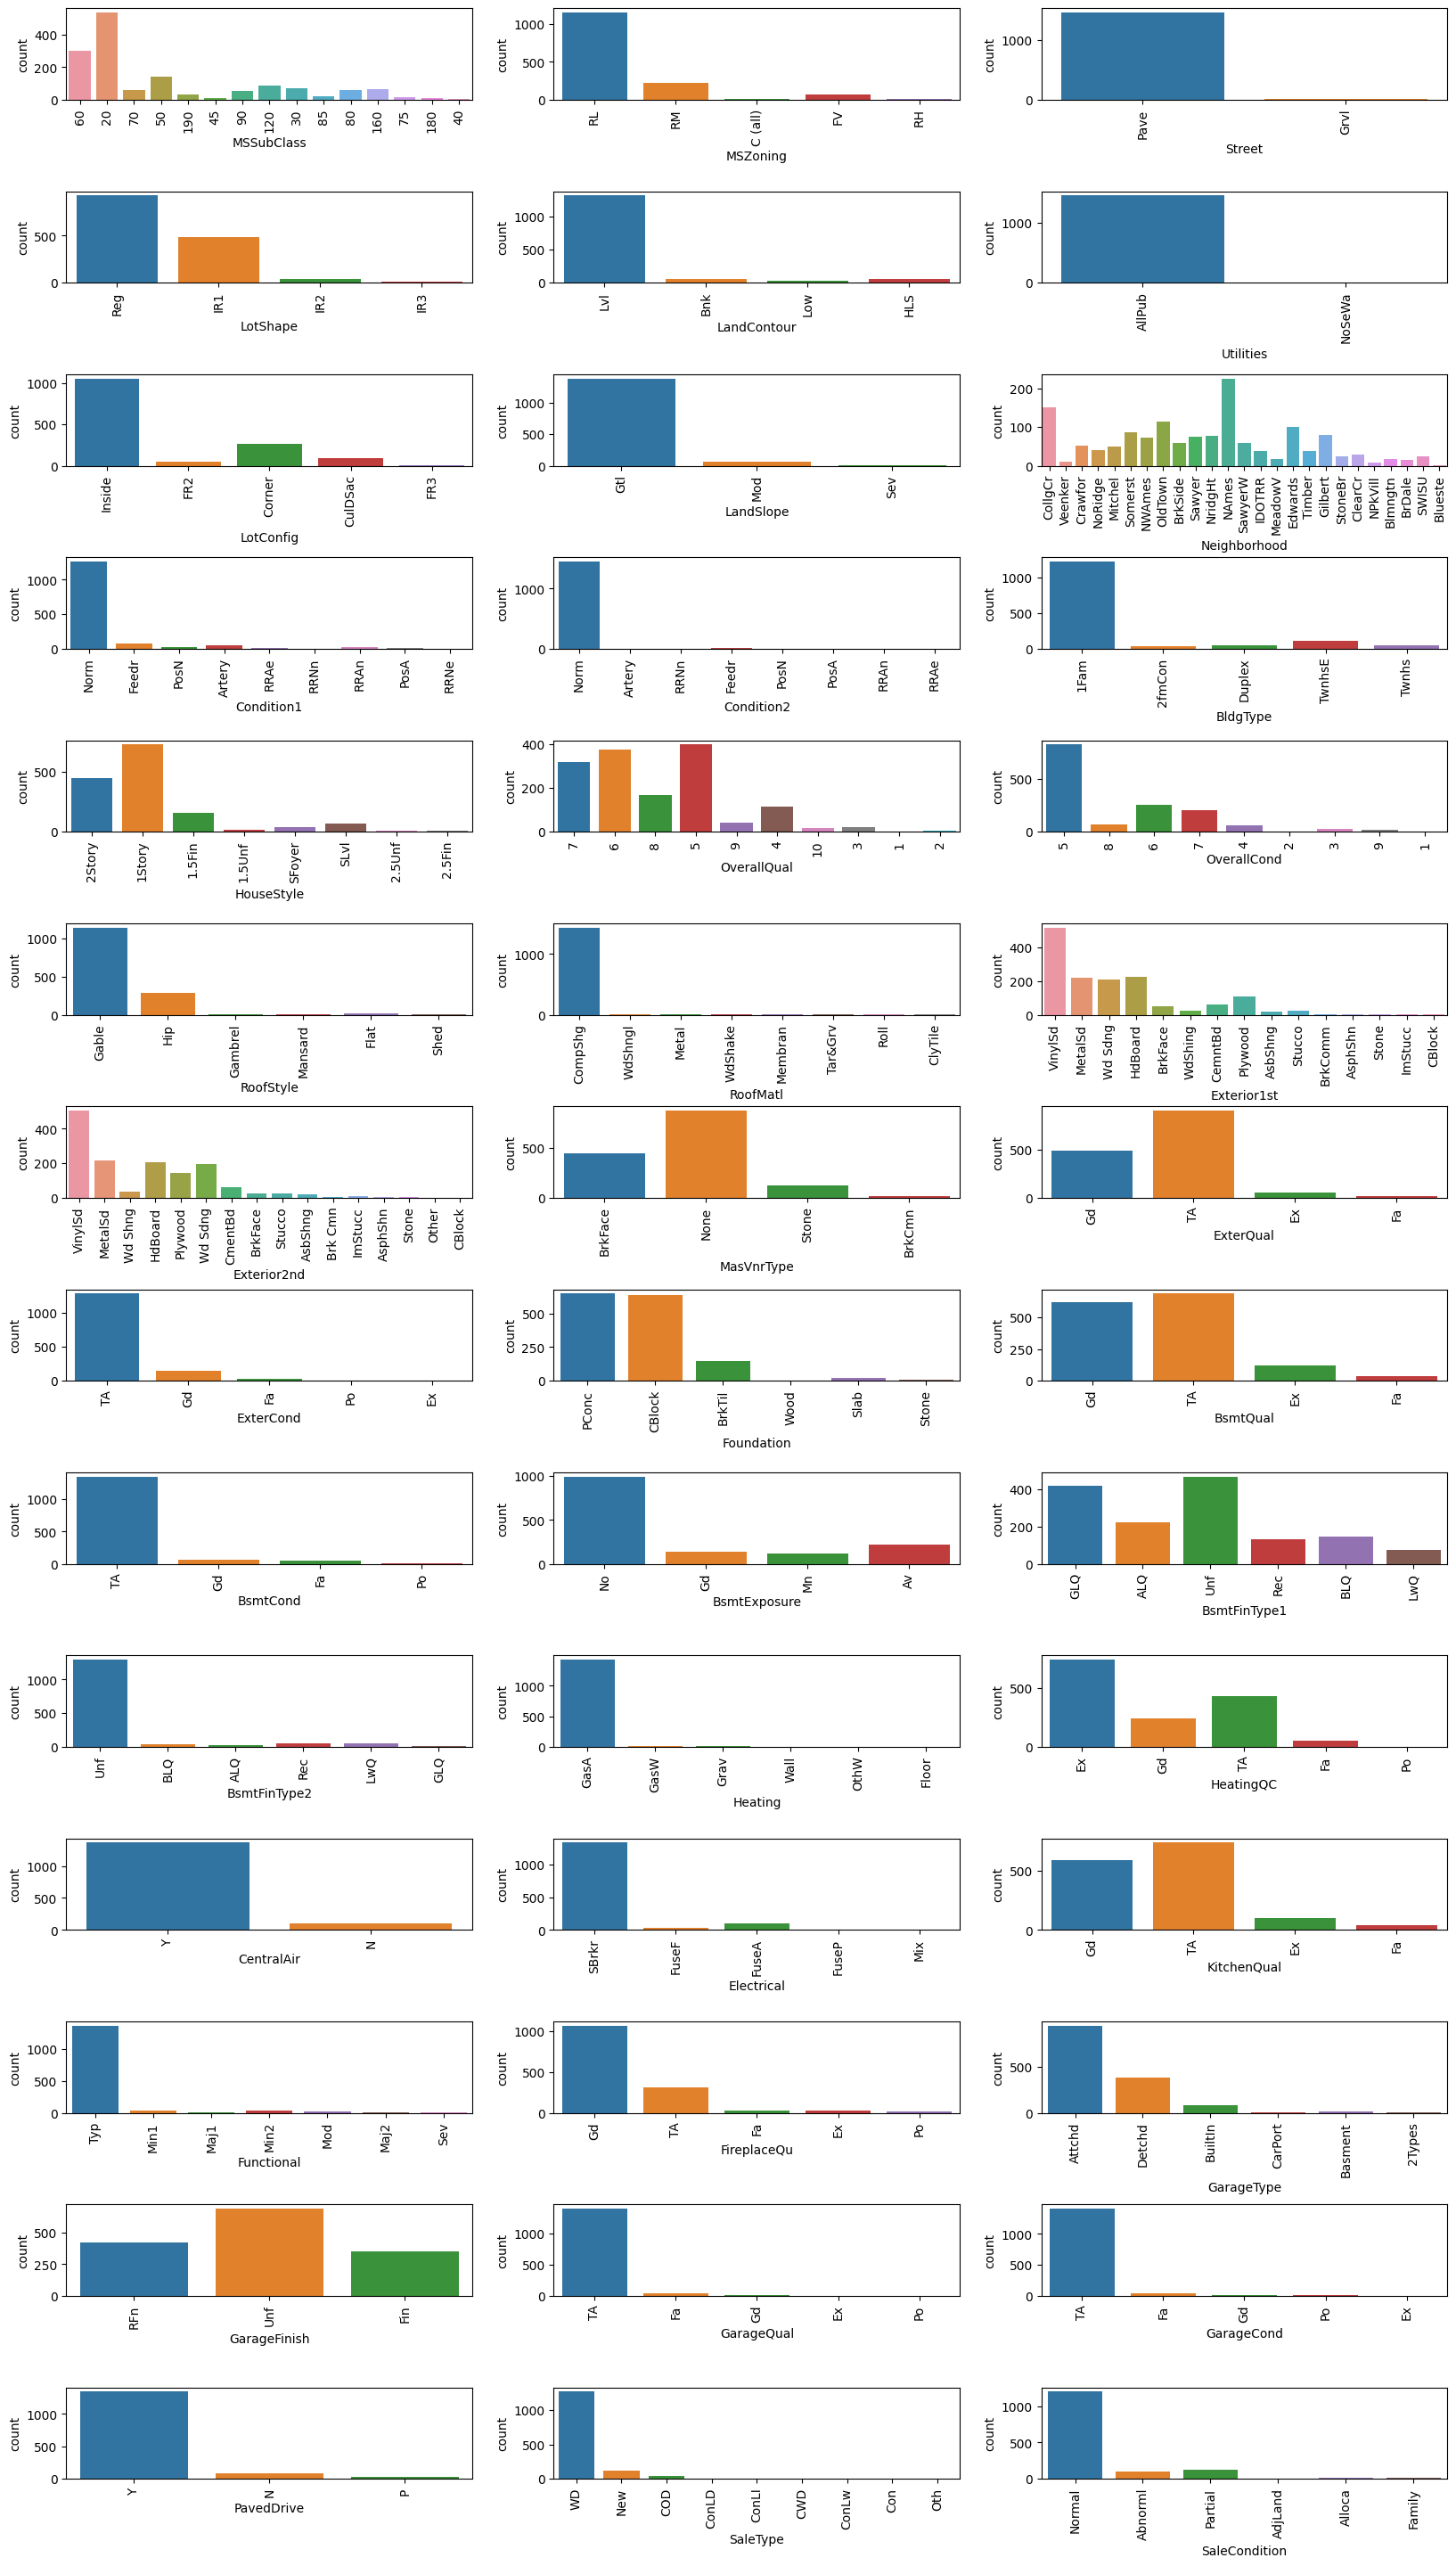

In [840]:
plt.figure(figsize=(20,100), facecolor='white')
plotnumber = 1

for column in data.select_dtypes(exclude='number'):
    if plotnumber<=50 :
        ax = plt.subplot(38,3,plotnumber)
        sns.countplot(x = data[column])
        plt.xlabel(column,fontsize=10)
        plt.xticks(rotation = 90)
        
    plotnumber+=1
plt.subplots_adjust(hspace=1) # adjust the spacing between subplots
plt.show()

In [841]:
data.select_dtypes(exclude='number').columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [842]:
## Method for dropping categorial feature
# - If data is skewed above 80% in one feature then we will drop those feature

In [843]:
cat_rem_col = ["Street", "Utilities", "Condition1", "Condition2", 'LandContour', 'LandSlope', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 
               'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [844]:
data.drop(cat_rem_col, axis = 1, inplace = True)

In [845]:
str_cols_new = list(data.select_dtypes(include=['object']).columns)

In [846]:
str_cols_new

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

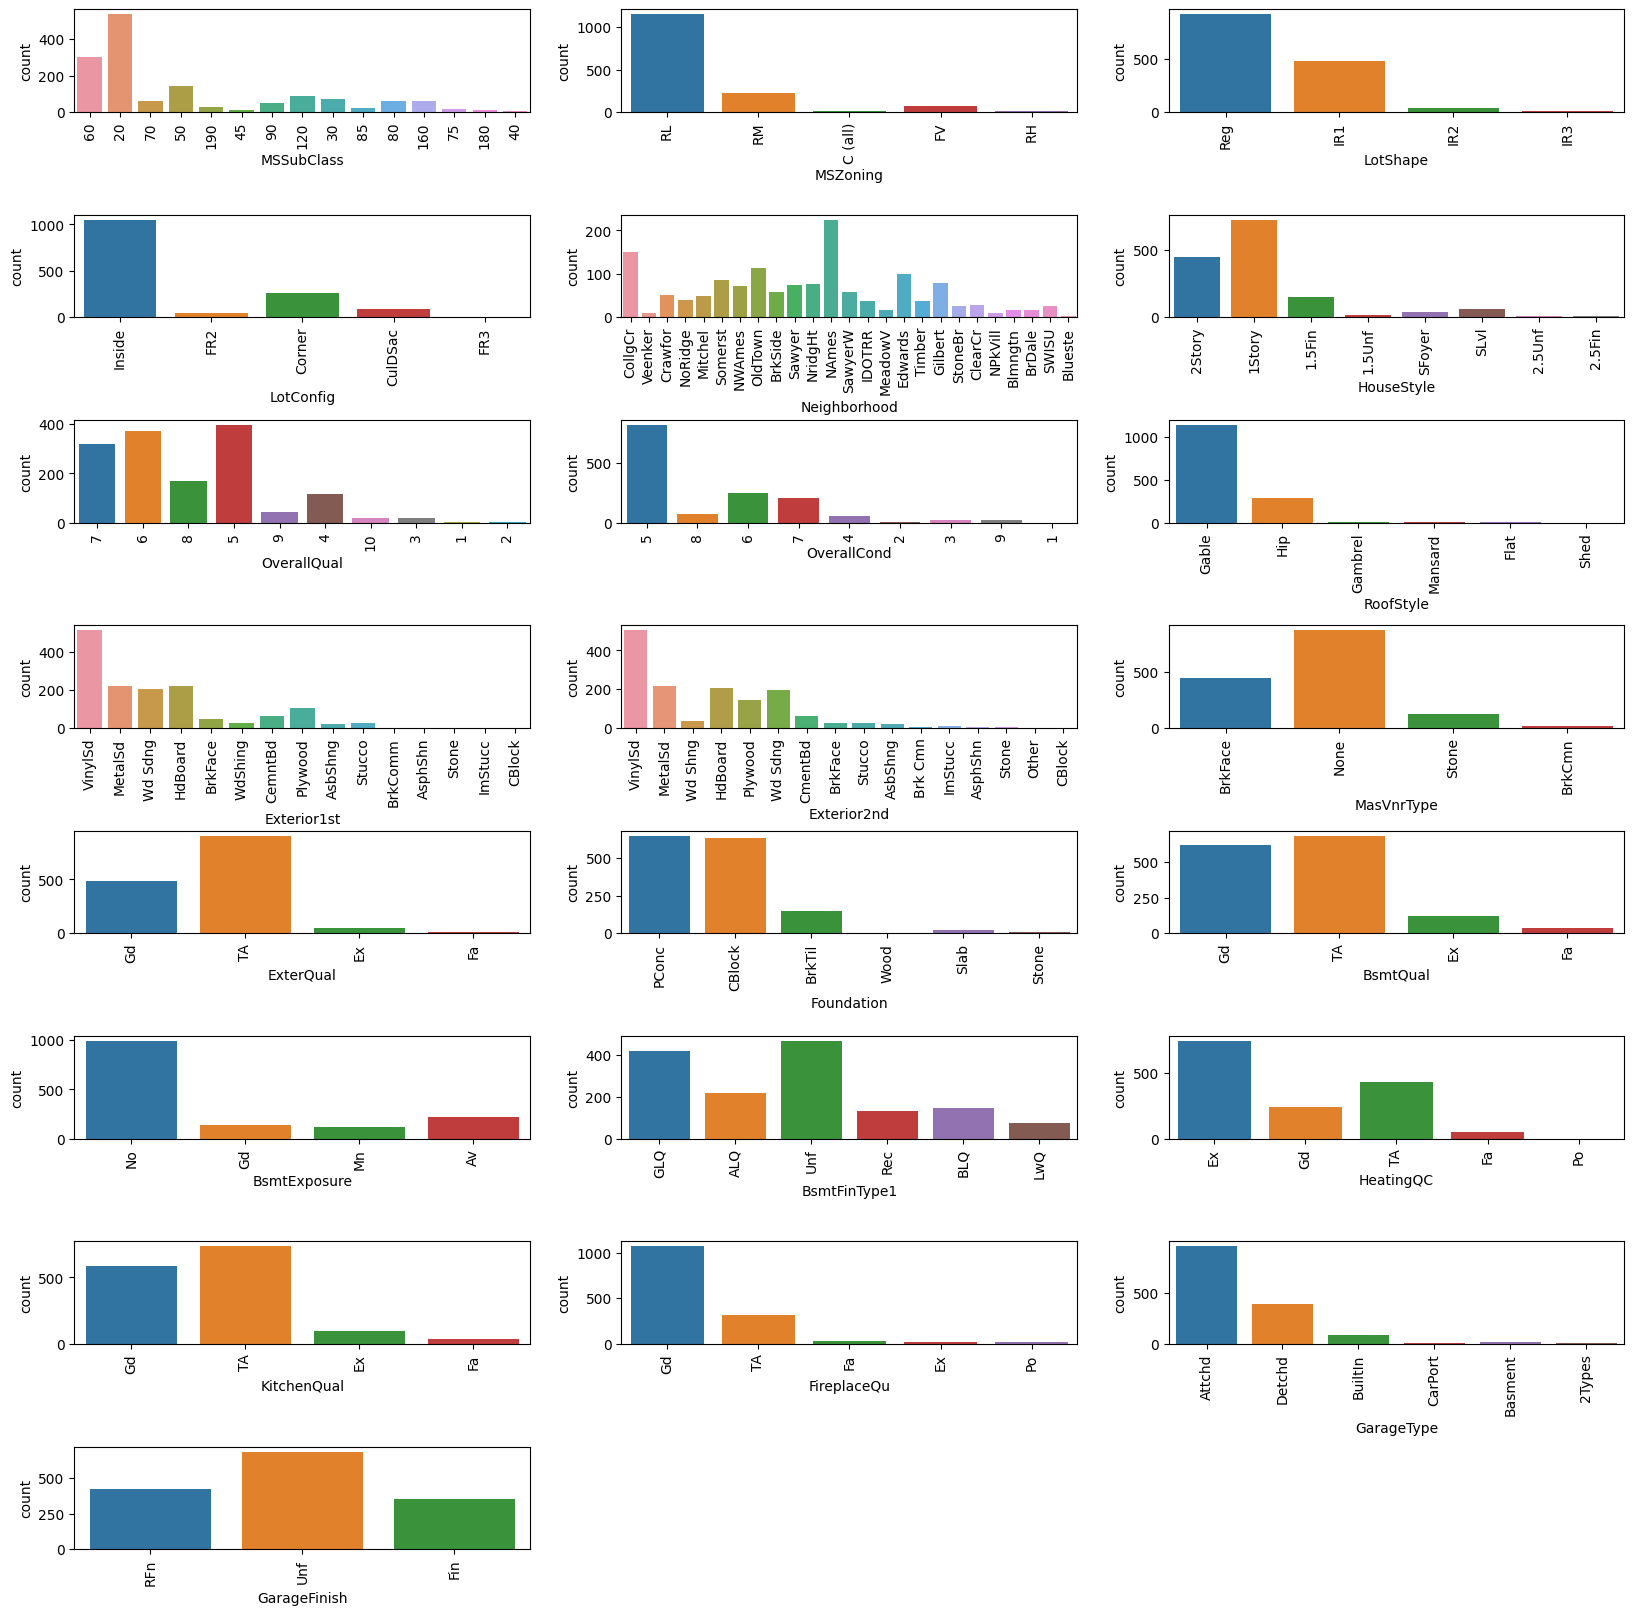

In [847]:
plt.figure(figsize=(20,100), facecolor='white')
plotnumber = 1

for column in data.select_dtypes(exclude='number'):
    if plotnumber<=39 :
        ax = plt.subplot(38,3,plotnumber)
        sns.countplot(x = data[column])
        plt.xlabel(column,fontsize=10)
        plt.xticks(rotation = 90)
        
    plotnumber+=1
plt.subplots_adjust(hspace=1) # adjust the spacing between subplots
plt.show()

In [848]:
len(str_cols_new)

22

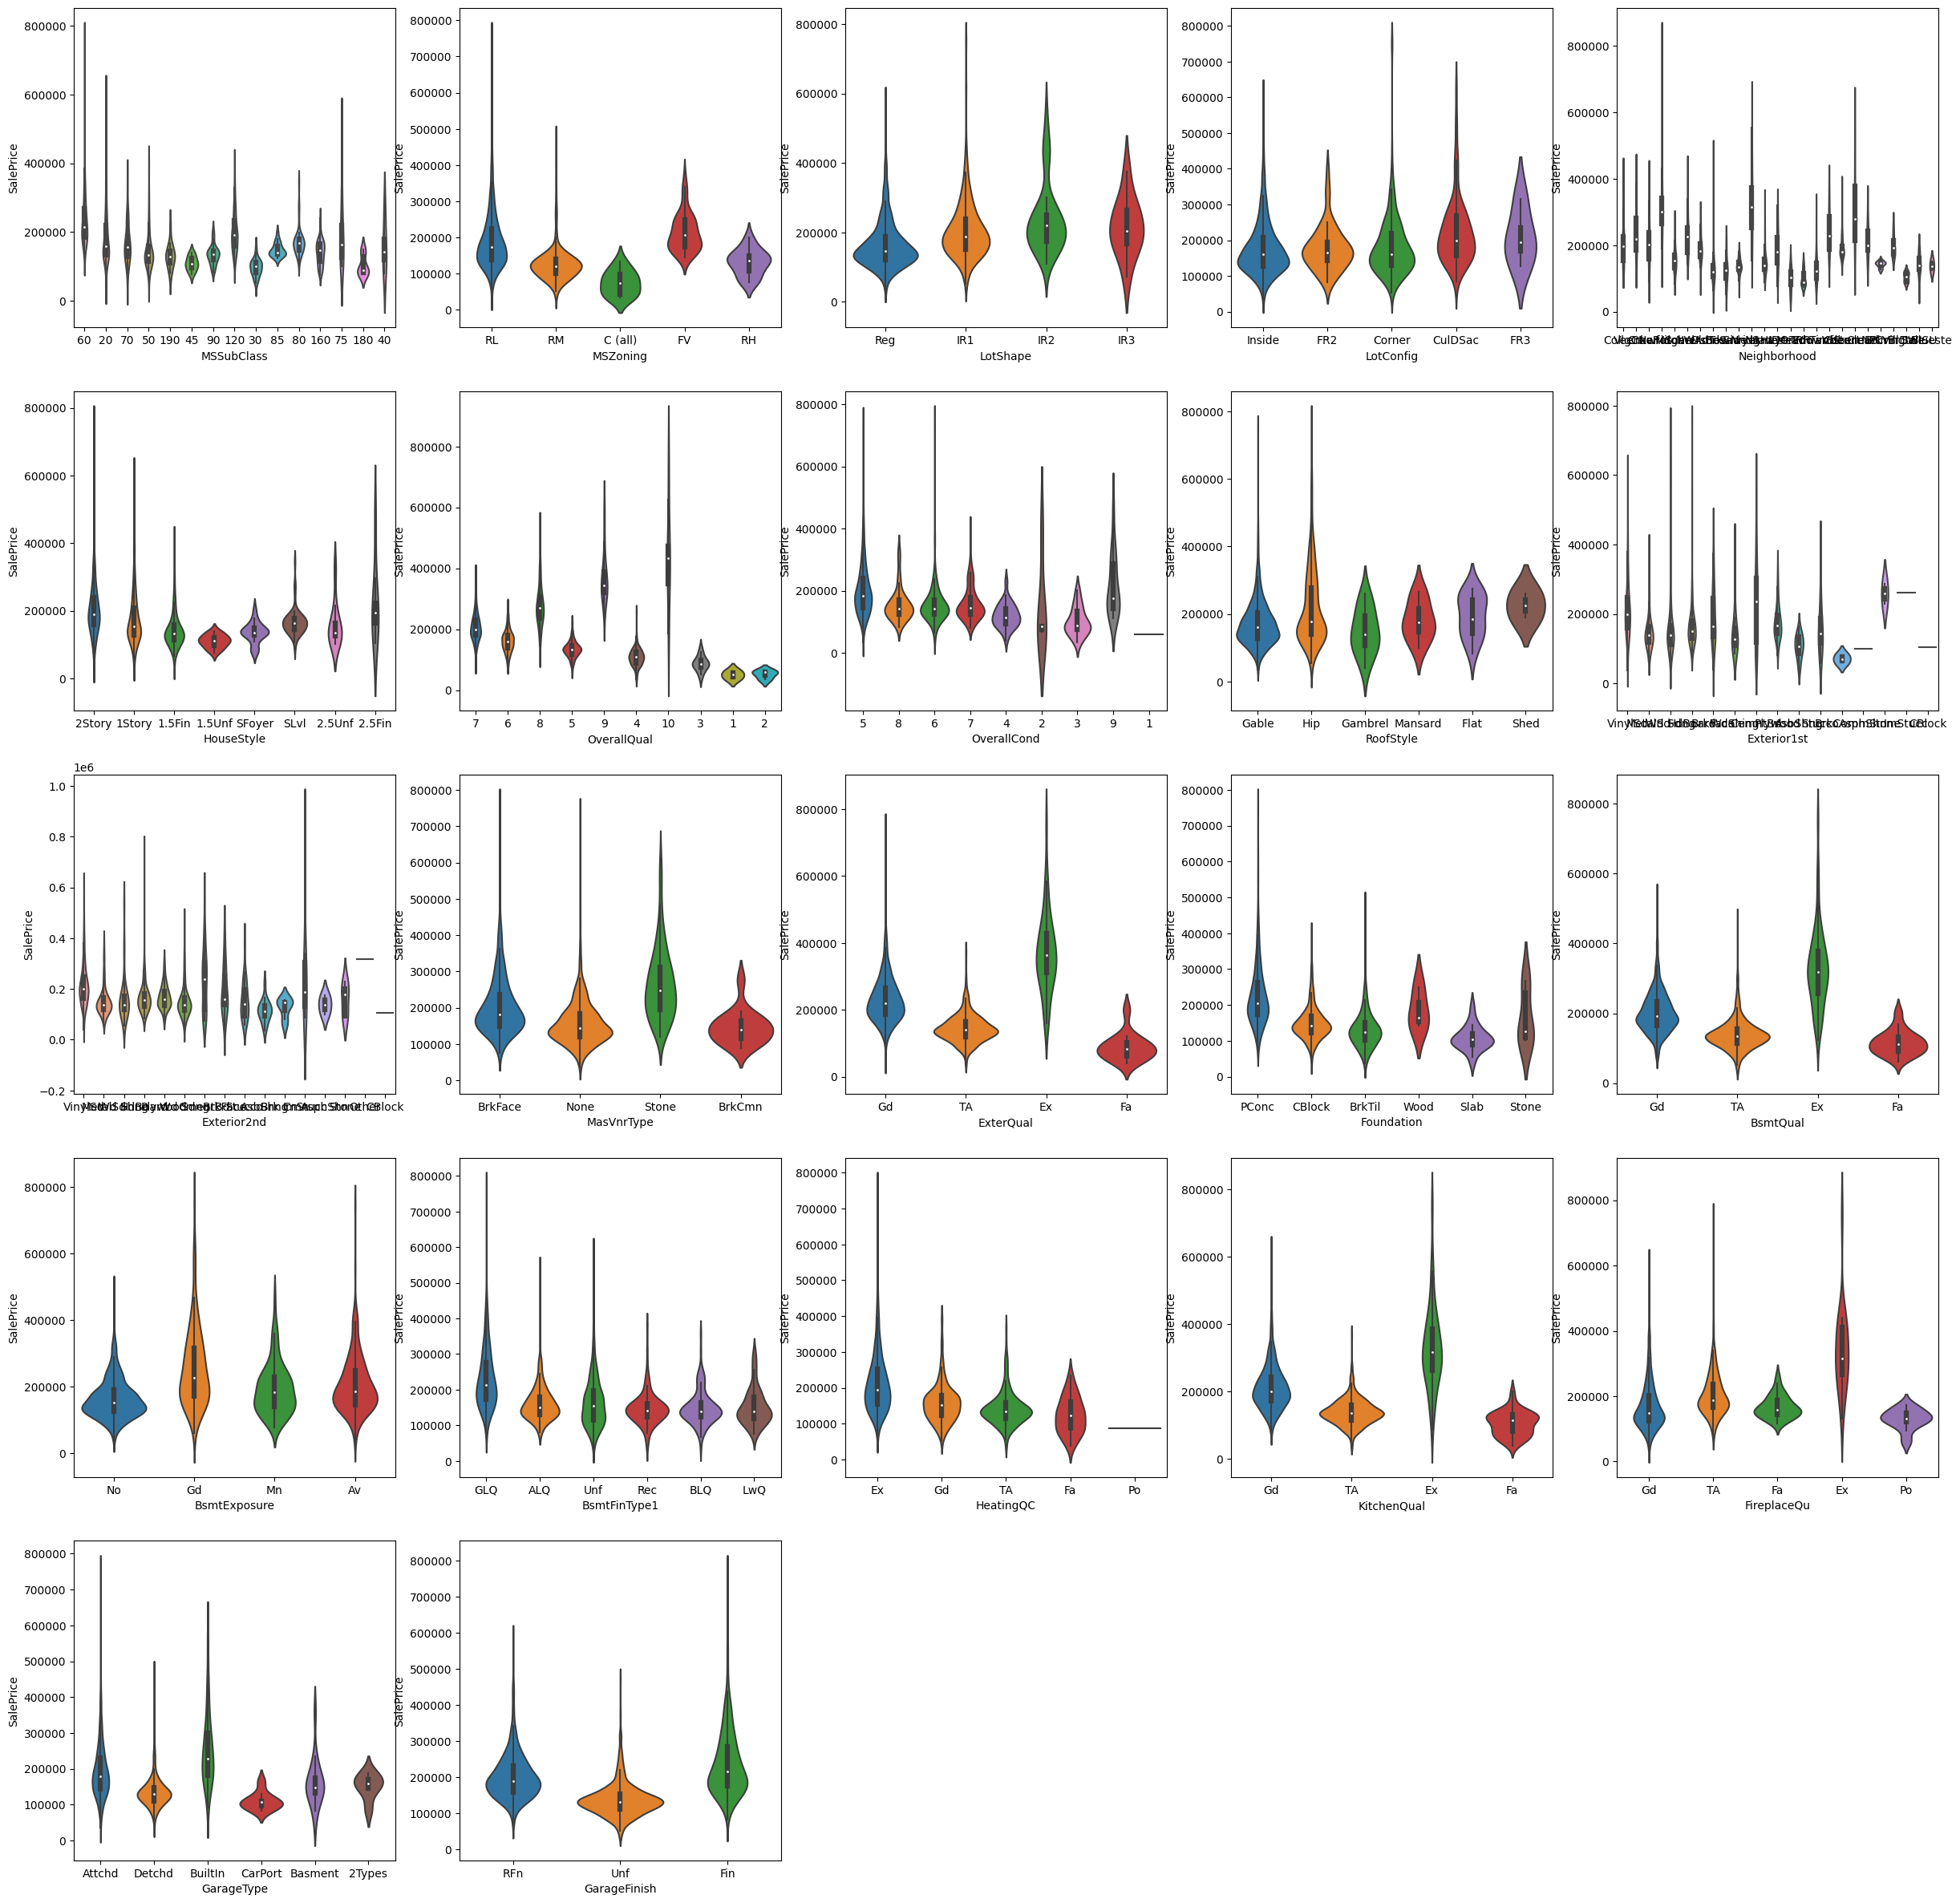

In [849]:
# Bivariate Analysis
plt.figure(figsize=(30,30), facecolor='white')
plotnumber = 1

for column in data.select_dtypes(exclude='number'):
    if plotnumber<=50 :     
        ax = plt.subplot(5,5,plotnumber)
        sns.violinplot(x=data[column],y=data['SalePrice'])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

In [850]:
# list_obj=list(df.select_dtypes(exclude='number').columns)
# list_obj
# dummy=pd.get_dummies(df[list_obj],prefix=list_obj,drop_first=True)
# dummy
# df=pd.concat([df,dummy],axis=1)
# df=df.drop(list_obj,axis=1)
# df.shape

In [851]:
## Dummy Variable Creation
MSSubClass = pd.get_dummies(data.MSSubClass, drop_first=True).add_prefix('MSSubClass_')
MSZoning = pd.get_dummies(data.MSZoning, drop_first=True).add_prefix('MSZoning_')
LotShape = pd.get_dummies(data.LotShape, drop_first=True).add_prefix('LotShape_')
LotConfig = pd.get_dummies(data.LotConfig, drop_first=True).add_prefix('LotConfig_')
Neighborhood = pd.get_dummies(data.Neighborhood, drop_first=True).add_prefix('Neighborhood_')
HouseStyle = pd.get_dummies(data.HouseStyle, drop_first=True).add_prefix('HouseStyle_')
OverallQual = pd.get_dummies(data.OverallQual, drop_first=True).add_prefix('OverallQual_')
OverallCond = pd.get_dummies(data.OverallCond, drop_first=True).add_prefix('OverallCond_')
RoofStyle = pd.get_dummies(data.RoofStyle, drop_first=True).add_prefix('RoofStyle_')
Exterior1st = pd.get_dummies(data.Exterior1st, drop_first=True).add_prefix('Exterior1st_')
Exterior2nd = pd.get_dummies(data.Exterior2nd, drop_first=True).add_prefix('Exterior2nd_')
MasVnrType = pd.get_dummies(data.MasVnrType, drop_first=True).add_prefix('MasVnrType_')
ExterQual = pd.get_dummies(data.ExterQual, drop_first=True).add_prefix('ExterQual_')
Foundation = pd.get_dummies(data.Foundation, drop_first=True).add_prefix('Foundation_')
BsmtQual = pd.get_dummies(data.BsmtQual, drop_first=True).add_prefix('BsmtQual_')
BsmtExposure = pd.get_dummies(data.BsmtExposure, drop_first=True).add_prefix('BsmtExposure_')
BsmtFinType1 = pd.get_dummies(data.BsmtFinType1, drop_first=True).add_prefix('BsmtFinType1_')
HeatingQC = pd.get_dummies(data.HeatingQC, drop_first=True).add_prefix('HeatingQC_')
KitchenQual = pd.get_dummies(data.KitchenQual, drop_first=True).add_prefix('KitchenQual_')
FireplaceQu = pd.get_dummies(data.FireplaceQu, drop_first=True).add_prefix('FireplaceQu_')
GarageType = pd.get_dummies(data.GarageType, drop_first=True).add_prefix('GarageType_')
GarageFinish = pd.get_dummies(data.GarageFinish, drop_first=True).add_prefix('GarageFinish_')

# dummies.rename(columns = {2:'summer', 3:'fall', 4:'winter'}, inplace = True)

In [852]:
data = pd.concat([data,MSSubClass,
MSZoning,
LotShape,
LotConfig,
Neighborhood,
HouseStyle,
OverallQual,
OverallCond,
RoofStyle,
Exterior1st,
Exterior2nd,
MasVnrType,
ExterQual,
Foundation,
BsmtQual,
BsmtExposure,
BsmtFinType1,
HeatingQC,
KitchenQual,
FireplaceQu,
GarageType,
GarageFinish], axis=1)

In [853]:
data.shape

(1460, 203)

In [854]:
# Remove columns 
col = ["MSSubClass",
"MSZoning",
"LotShape",
"LotConfig",
"Neighborhood",
"HouseStyle",
"OverallQual",
"OverallCond",
"RoofStyle",
"Exterior1st",
"Exterior2nd",
"MasVnrType",
"ExterQual",
"Foundation",
"BsmtQual",
"BsmtExposure",
"BsmtFinType1",
"HeatingQC",
"KitchenQual",
"FireplaceQu",
"GarageType",
"GarageFinish"]

data.drop(col, axis = 1, inplace = True)

In [855]:
data.shape

(1460, 181)

In [856]:
# check all numerical columns now

In [857]:
len(data.select_dtypes(include=['int', 'float']).columns)

34

In [858]:
# After checking the boxplot and histplot, saw that these columns are skewed at one side 
num_col_del = ['LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtFinSF2']
data.drop(num_col_del, axis = 1, inplace = True)

In [859]:
# 'LotFrontage', 'LotArea','BsmtUnfSF','BsmtFinSF1','MasVnrArea','TotalBsmtSF','OpenPorchSF','WoodDeckSF']

In [860]:
# Handle Outliers
data = data[data['LotFrontage'] <= data['LotFrontage'].quantile(0.97)]
data = data[data['LotArea'] <= data['LotArea'].quantile(0.97)]
data = data[data['BsmtUnfSF'] <= data['BsmtUnfSF'].quantile(0.97)]
data = data[data['BsmtFinSF1'] <= data['BsmtFinSF1'].quantile(0.97)]
data = data[data['MasVnrArea'] <= data['MasVnrArea'].quantile(0.97)]
data = data[data['TotalBsmtSF'] <= data['TotalBsmtSF'].quantile(0.97)]
data = data[data['OpenPorchSF'] <= data['OpenPorchSF'].quantile(0.97)]
data = data[data['WoodDeckSF'] <= data['WoodDeckSF'].quantile(0.97)]

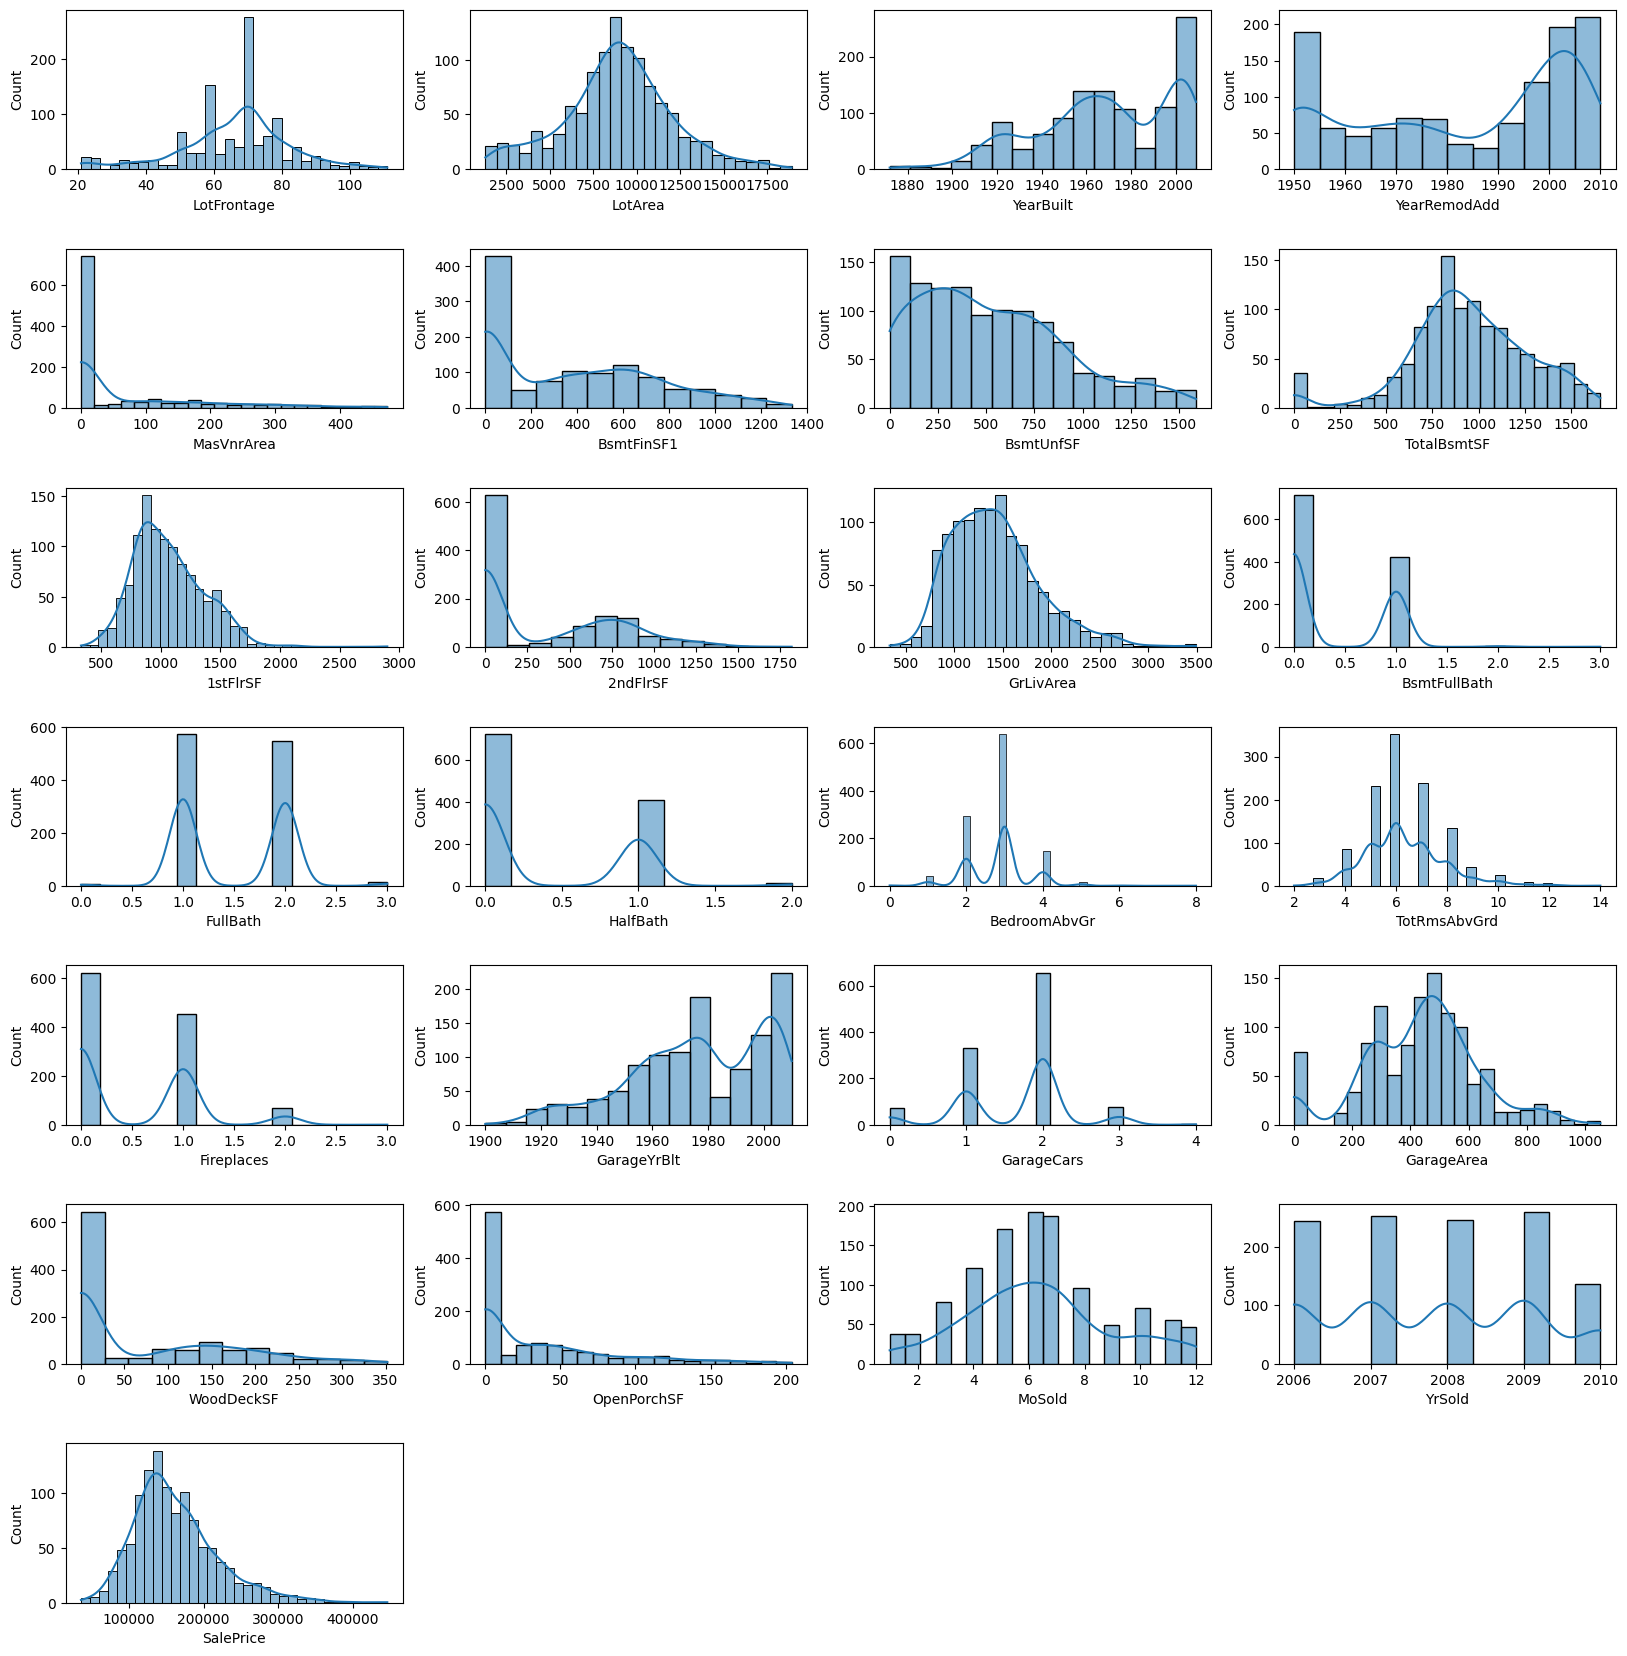

In [861]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in data.select_dtypes(include=['int', 'float']):
    if plotnumber<=50:     # as there are 9 columns in the data
        ax = plt.subplot(10,4,plotnumber)
        sns.histplot(data[column], kde = True)
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.subplots_adjust(hspace=0.5) # adjust the spacing between subplots
plt.show()

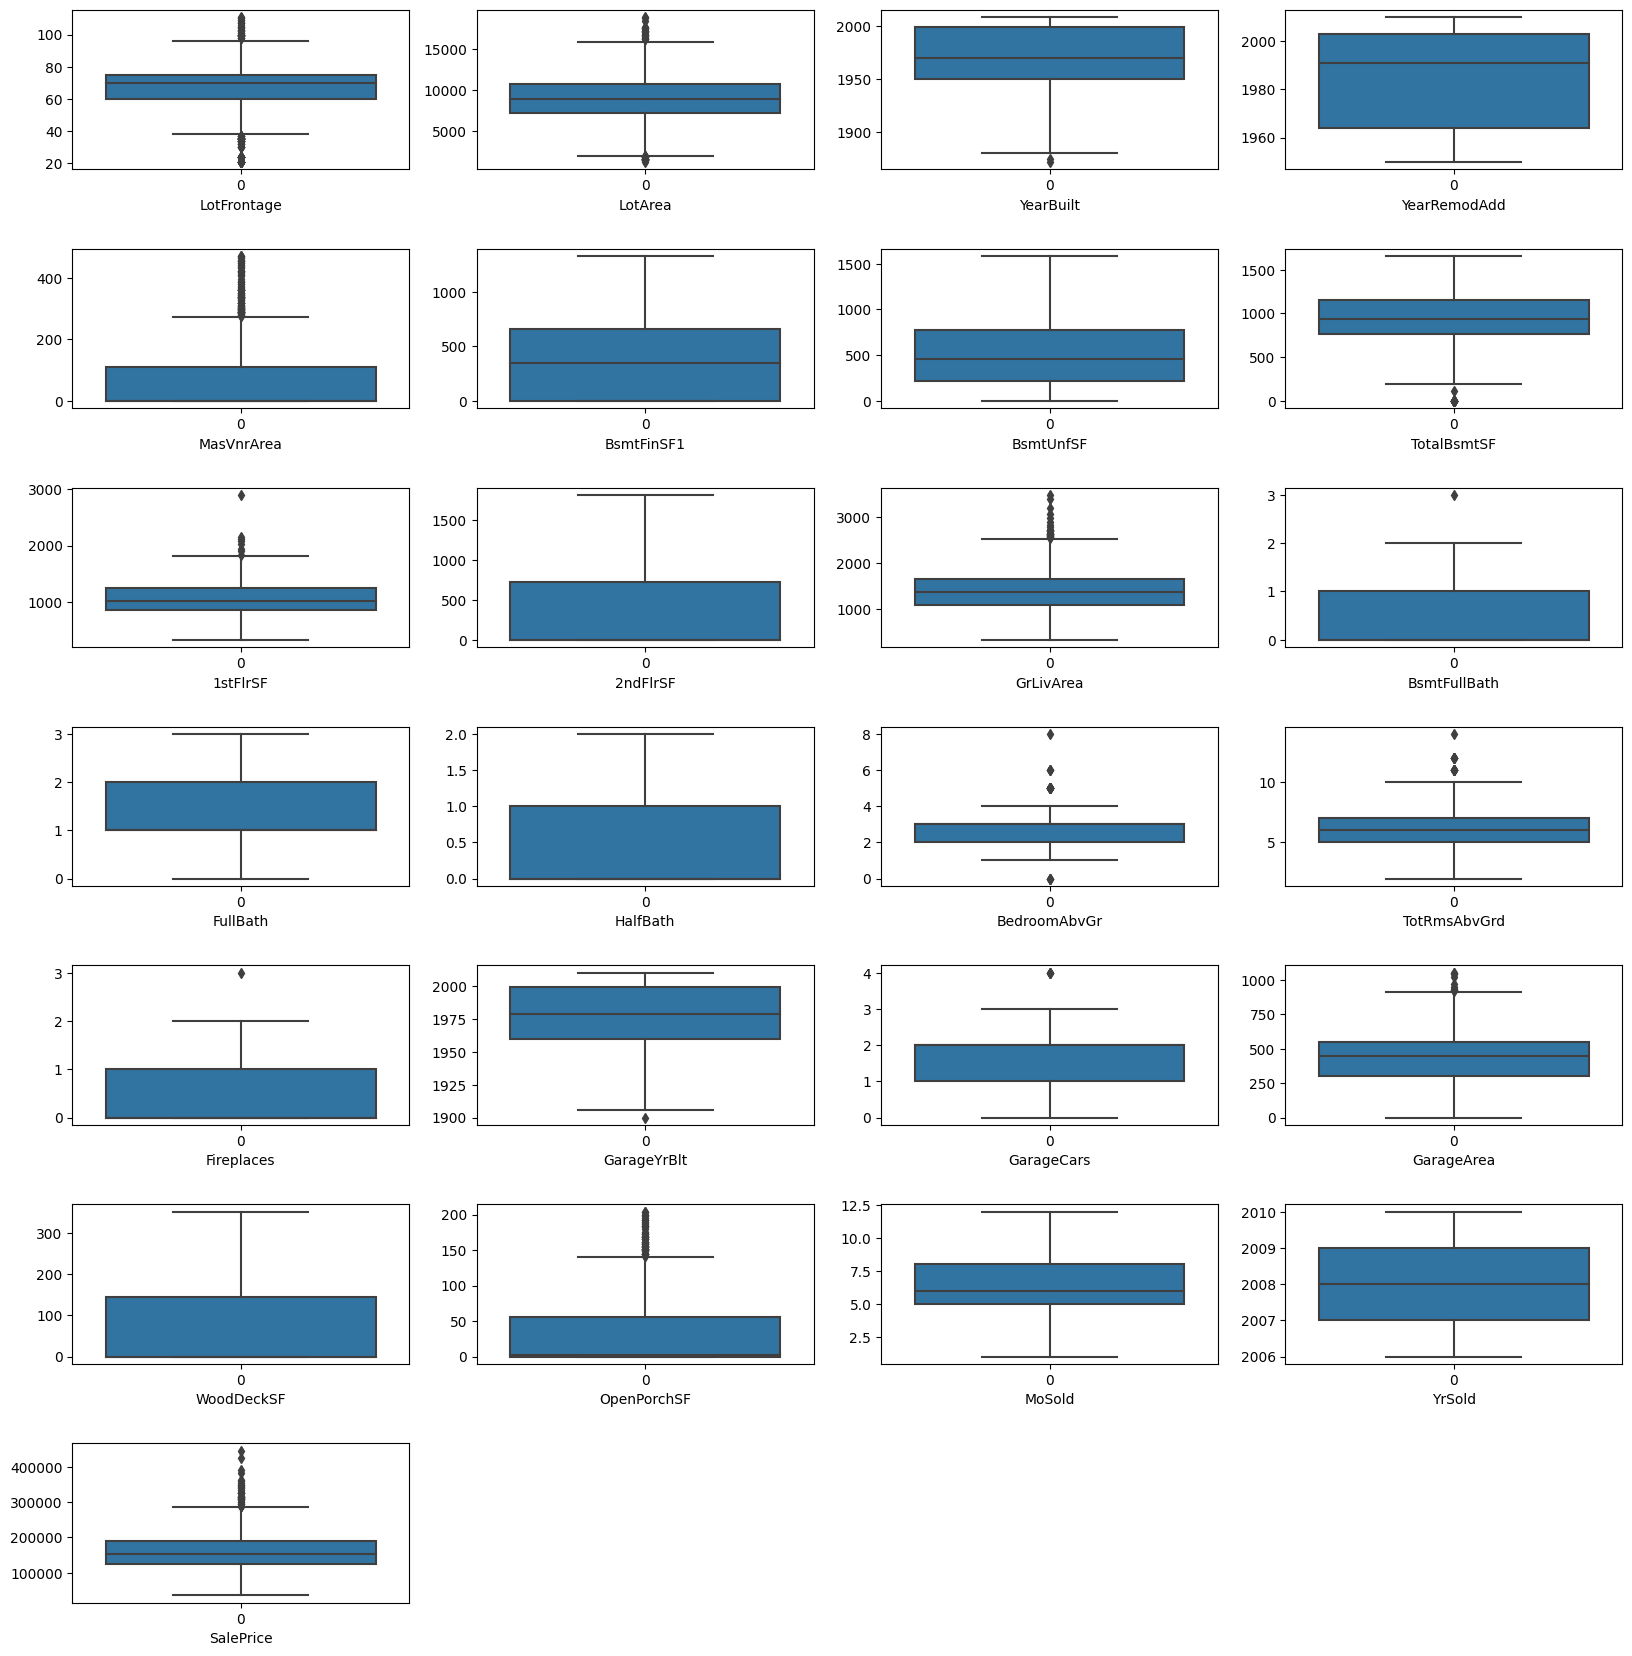

In [862]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1
for column in data.select_dtypes(include=['int', 'float']):
    if plotnumber<=38 : 
        ax = plt.subplot(10,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.subplots_adjust(hspace=0.5) # adjust the spacing between subplots
plt.show()

In [863]:
# try to fill all columns by removing outliers present in the dataset

In [864]:
# Need to remove the outliers first from the target variable - SalePrice

In [865]:
X = data.loc[:, data.columns != 'SalePrice']

In [866]:
y = data['SalePrice']

In [867]:
X.shape

(1142, 171)

In [868]:
y.shape

(1142,)

In [869]:
# X = X.reset_index()

In [870]:
# y = y.reset_index()

In [871]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [872]:
X_train.shape

(799, 171)

In [873]:
X_test.shape

(343, 171)

In [874]:
## Model Building Using Linear Regression

In [875]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [876]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-296633.1747633832
[ 1.06348889e+02  1.12457026e+00  3.70590877e+02  1.43098886e+02
 -4.60174246e+00 -8.22411403e+00 -1.75230590e+01  3.47740696e+01
  5.93010292e-01  1.01963061e+01  4.02421320e+01  2.31033910e+03
  5.81795365e+03  1.23060165e+03 -2.58768381e+03  4.06332977e+02
  5.14889458e+03  5.26264535e+01  4.29741136e+03  1.19677423e+01
  3.46082208e+00  1.37969362e+01  4.55345602e+01 -4.17900034e+02
 -1.76477294e+04 -1.60710705e+04 -4.47473680e+03  9.53069165e+03
  9.45757091e+03  1.00083300e+03  2.11475849e+04  2.76125093e+03
  7.46735594e+03  1.03453814e+04  4.07199191e+03 -1.51441842e+04
 -1.27398352e+03 -1.18268081e+04  5.02311575e+04  4.22305833e+04
  4.22292969e+04  3.42150638e+04  2.11001186e+02  1.65543408e+02
  4.64091449e+02 -1.12514992e+03 -6.02845660e+03  3.45378849e+03
 -1.40722331e+03 -8.54629509e+02  1.24512372e+04 -1.41585031e+03
 -2.46032826e+04 -1.18116677e+04  1.49693616e+04 -2.18163394e+04
 -1.76128216e+04 -1.04632685e+04 -7.07372067e+03 -2.19768048e+04
 -2.04

In [877]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9340219940008032
0.9092162515924075
162741672123.2555
108586456940.54657
203681692.2694061
316578591.66340107


In [878]:
mean_absolute_error(y_test, y_pred_test)

13479.938249040742

In [879]:
## RFE using simple Linear regression estimator

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# lm = LinearRegression()
# lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select=100)
rfe = rfe.fit(X_train, y_train)

In [880]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 52),
 ('LotArea', False, 67),
 ('YearBuilt', False, 48),
 ('YearRemodAdd', False, 53),
 ('MasVnrArea', False, 65),
 ('BsmtFinSF1', False, 62),
 ('BsmtUnfSF', False, 61),
 ('TotalBsmtSF', False, 57),
 ('1stFlrSF', False, 68),
 ('2ndFlrSF', False, 64),
 ('GrLivArea', False, 55),
 ('BsmtFullBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 50),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 54),
 ('GarageCars', True, 1),
 ('GarageArea', False, 58),
 ('WoodDeckSF', False, 66),
 ('OpenPorchSF', False, 59),
 ('MoSold', False, 56),
 ('YrSold', False, 41),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', True, 1),
 ('MSSubClass_190', True, 1),
 ('MSSubClass_20', True, 1),
 ('MSSubClass_30', False, 26),
 ('MSSubClass_40', False, 19),
 ('MSSubClass_45', False, 23),
 ('MSSubClass_50', False, 17),
 ('MSSubClass_60', True, 1),
 ('MSSubClass_70', False, 20),
 ('MSSubClass_75', False, 30),
 ('MSSubClass_80

In [881]:
col = X_train.columns[rfe.support_]
len(col)
print(col)

Index(['BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'MSSubClass_20', 'MSSubClass_60', 'MSSubClass_80', 'MSSubClass_90',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR2', 'LotShape_IR3', 'LotConfig_FR2', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'HouseStyle_2.5Fin', 'HouseStyle_SLvl',
       'OverallQual_10', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8',
       'OverallQua

In [882]:
## USING RFE
X = data[['BsmtFullBath', 'FullBath', 'HalfBath', 'Fireplaces',
       'GarageCars', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'MSSubClass_20', 'MSSubClass_60', 'MSSubClass_80', 'MSSubClass_90',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR2', 'LotShape_IR3', 'LotConfig_FR2', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'HouseStyle_2.5Fin', 'HouseStyle_SLvl',
       'OverallQual_10', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4',
       'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8',
       'OverallCond_9', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Shed', 'Exterior1st_AsphShn',
       'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CmentBd',
       'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd',
       'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_Wd Shng', 'MasVnrType_Stone', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtFinType1_LwQ',
       'BsmtFinType1_Unf', 'HeatingQC_Po', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_CarPort', 'GarageType_Detchd']]

In [883]:
# X.head(5)

In [884]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [885]:
actual_value = pd.DataFrame(y_test).reset_index()
pred_value = pd.DataFrame(y_pred_test).reset_index()


final = pd.concat([actual_value, pred_value], axis = 1)
final.drop('index', axis = 1, inplace = True)
final = final.rename(columns = {0: "predsale"})
final = round(final,2)
# final.head(100)
final.columns

Index(['SalePrice', 'predsale'], dtype='object')

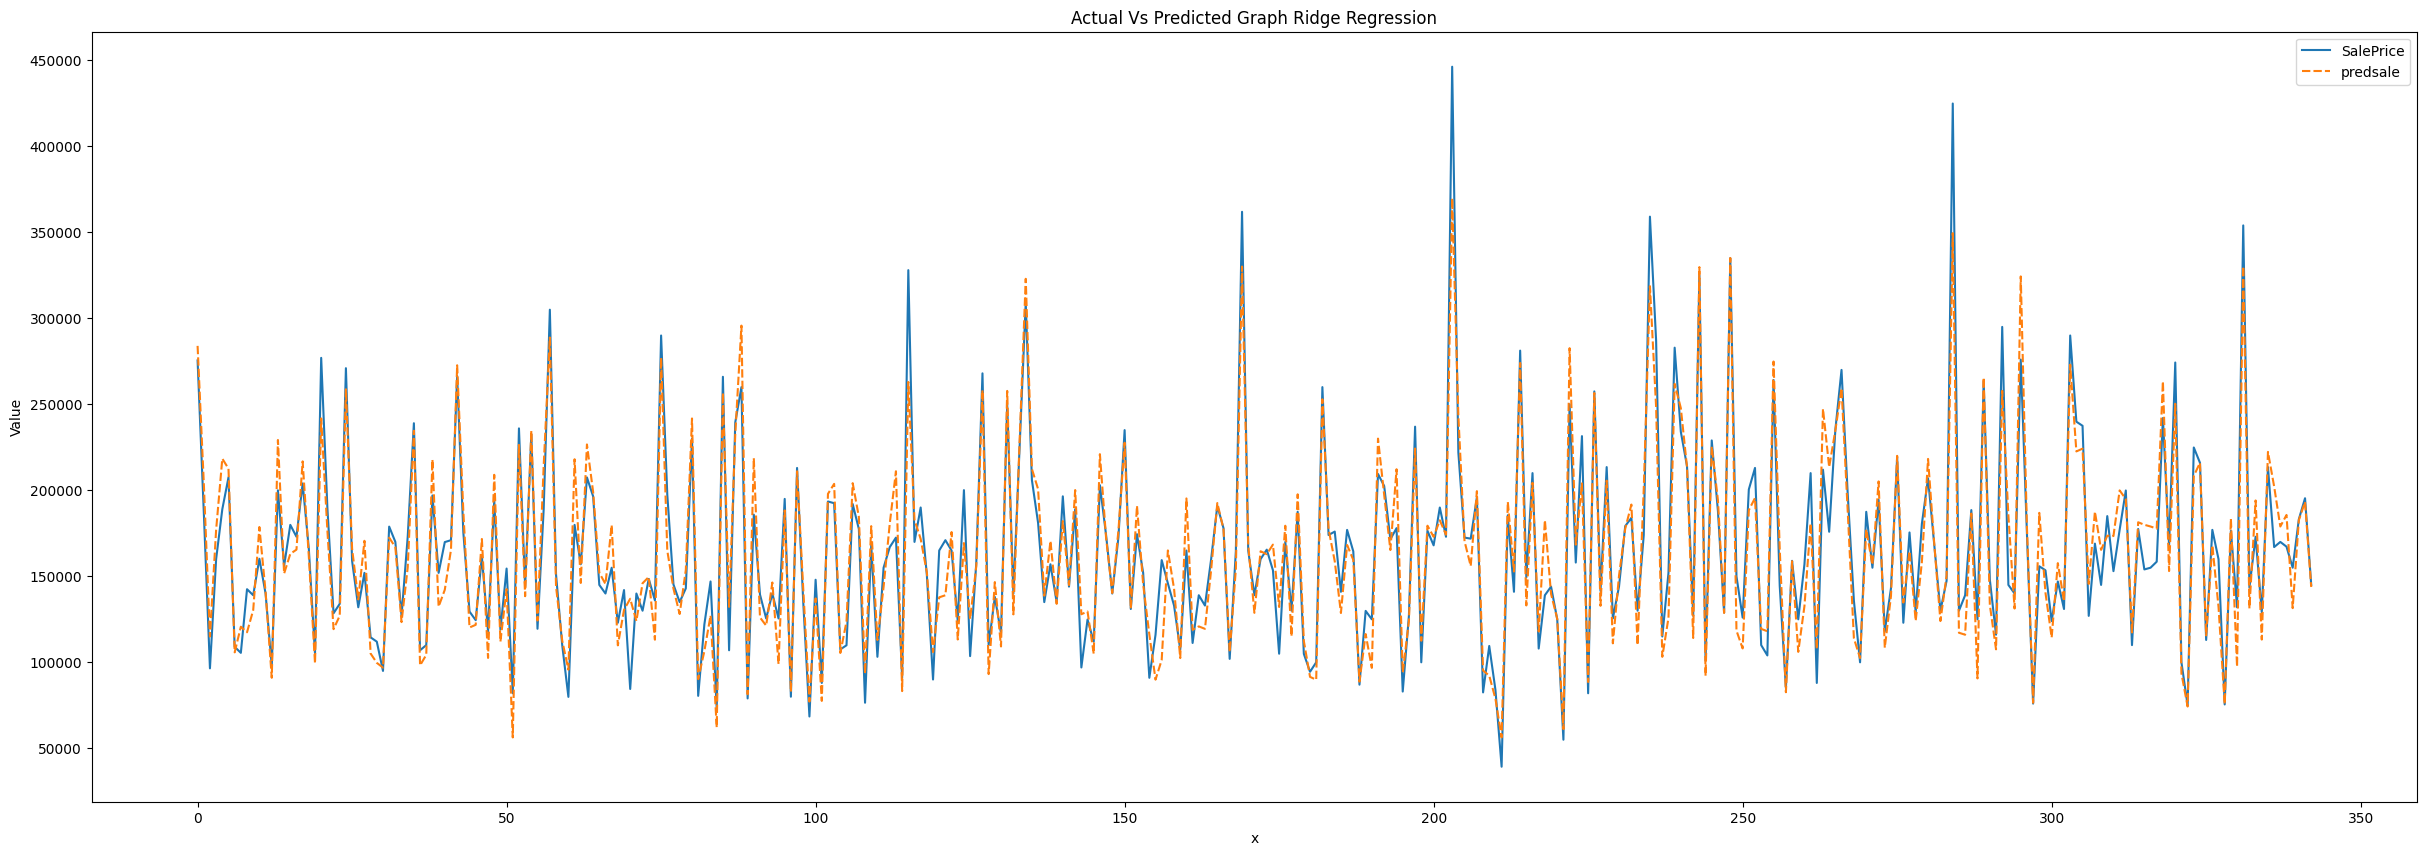

In [886]:
# Plot Graph between actual and predicted
plt.figure(figsize = [30, 10])
sns.lineplot(data=final[['SalePrice', 'predsale']])
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Actual Vs Predicted Graph Ridge Regression')
plt.show()

In [887]:
# Ridge Regression

In [888]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [889]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [890]:
# Printing the best hyperparameter alpha
# print(model_cv.best_params_)
alpha_val = model_cv.best_params_['alpha']
alpha_val

2.0

In [891]:
ridge = Ridge(alpha=alpha_val)  # You can adjust the alpha parameter as needed
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=2.0)

In [892]:
# #Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
# alpha = alpha_val
# ridge = Ridge(alpha=alpha)

# ridge.fit(X_train, y_train)
# print(ridge.coef_)

In [893]:
# ## RFE using Ridge

# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression

# # lm = LinearRegression()
# # lm.fit(X_train, y_train)

# rfe = RFE(estimator = ridge, n_features_to_select = 100)
# rfe = rfe.fit(X_train, y_train)

# list(zip(X_train.columns,rfe.support_,rfe.ranking_))

# # col = X_train.columns[rfe.support_]
# # len(col)
# # print(col)


In [894]:
# print(len(col))

In [895]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_scaled)
y_pred_test = ridge.predict(X_test_scaled)

y_pred_train = ridge.predict(X_train_scaled)
y_pred_test = ridge.predict(X_test_scaled)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8737534147359418
0.8480372410570223
311400444353.74554
181762681867.27875
389737727.60168403
529920355.29818875


In [896]:
mean_absolute_error(y_test, y_pred_test)

16556.083527946485

In [897]:
actual_value = pd.DataFrame(y_test).reset_index()
pred_value = pd.DataFrame(y_pred_test).reset_index()


final = pd.concat([actual_value, pred_value], axis = 1)
final.drop('index', axis = 1, inplace = True)
final = final.rename(columns = {0: "predsale"})
final = round(final,2)
# final.head(100)
final.columns

Index(['SalePrice', 'predsale'], dtype='object')

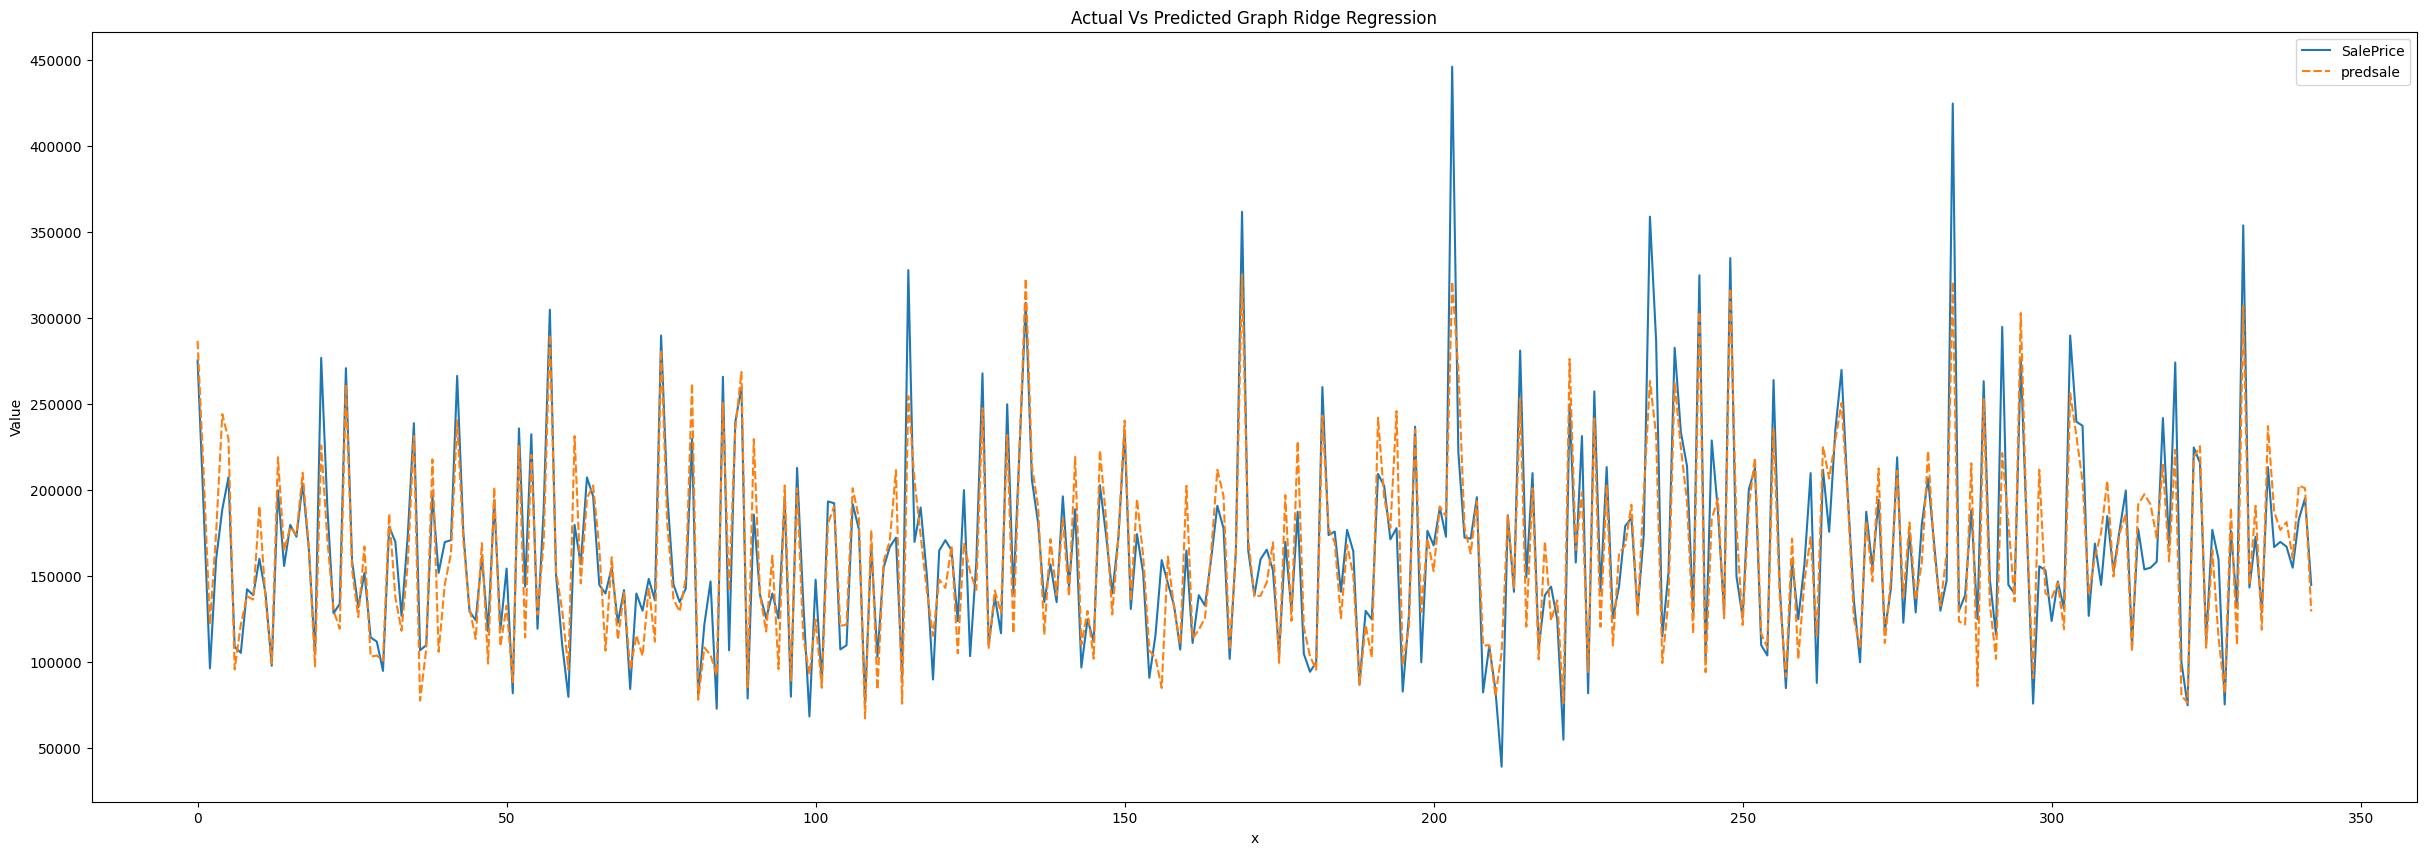

In [898]:
# Plot Graph between actual and predicted
plt.figure(figsize = [30, 10])
sns.lineplot(data=final[['SalePrice', 'predsale']])
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Actual Vs Predicted Graph Ridge Regression')
plt.show()

In [899]:
# Lasso Regression

In [900]:
## remove 5 important predictor variables

In [901]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [902]:
# Printing the best hyperparameter alpha
alpha_val = model_cv.best_params_['alpha']
alpha_val

20

In [903]:
# #Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

# alpha =alpha_val

# lasso = Lasso(alpha=alpha)
        
# lasso.fit(X_train, y_train) 

In [904]:
lasso = Lasso(alpha=alpha_val)  # You can adjust the alpha parameter as needed
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=20)

In [905]:
# ## RFE using lasso

# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression

# # lm = LinearRegression()
# # lm.fit(X_train, y_train)

# rfe = RFE(estimator = lasso, n_features_to_select=50)
# rfe = rfe.fit(X_train, y_train)

# list(zip(X_train.columns,rfe.support_,rfe.ranking_))

# # col = X_train.columns[rfe.support_]
# # len(col)
# # print(col)

In [906]:
X_train.columns

Index(['BsmtFullBath', 'FullBath', 'HalfBath', 'Fireplaces', 'GarageCars',
       'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20',
       'MSSubClass_60', 'MSSubClass_80', 'MSSubClass_90', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2',
       'LotShape_IR3', 'LotConfig_FR2', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'HouseStyle_2.5Fin', 'HouseStyle_SLvl',
       'OverallQual_10', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8',
       'OverallCond_2', 'OverallCo

In [907]:
lasso.coef_

array([ 25573.53179842,  71352.93865511,  24377.77233872,  27043.87545062,
        49270.31274748, -28303.94854348, -22387.18146382,  -3916.15540305,
        12009.11594661,  16520.30757174,  -2733.86441124,  -4626.1351802 ,
        17092.39199687,  16279.35016665,  18940.19245996,  13276.7175059 ,
         2201.30176394,  10357.74454769,  -8235.24137283,   6623.78525114,
        26659.59304497, -11824.85311606, -12735.5552548 ,  -9356.43501887,
       -12252.64080119, -11195.82403017, -19348.05644402,  28523.69991962,
        19214.05069166, -13066.34076726, -10111.62324853, -13277.45571004,
        -4758.60264541,   8978.04356815,  32745.54796164,  -7090.29463477,
        27739.14827362,   9793.24118035,     -0.        , -55064.69608805,
       -53462.0497072 , -37485.40833213, -33092.28793423, -23674.22333473,
       -10492.17096746,   9593.40747994,      0.        , -10216.18292697,
            0.        ,     -0.        ,   7390.07129722,  14932.79093072,
        13556.83143426,  

In [908]:
column_names = np.array(X_train.columns)
coefficients = lasso.coef_

In [909]:
sorted_indices = np.argsort(coefficients)[::-1]

In [910]:
sorted_indices

array([ 1,  4, 34, 63, 82, 27, 36,  3, 20,  0,  2, 81, 53, 28, 14, 12,  9,
       13, 51, 52, 15, 64, 59,  8, 17, 75, 37, 45, 33, 86, 50, 62, 19, 77,
       80, 79, 61, 16, 46, 48, 49, 38, 78, 55, 76, 57, 58, 70, 69, 65, 67,
       60, 87, 10, 94,  7, 68, 93, 11, 32, 71, 35, 18, 88, 23, 30, 47, 44,
       74, 25, 89, 21, 24, 22, 66, 29, 31, 72, 56, 73, 54, 26,  6, 43, 91,
        5, 92, 85, 84, 90, 42, 41, 83, 40, 39])

In [911]:
top_5_coefficients = coefficients[sorted_indices[:5]]
top_5_column_names = column_names[sorted_indices[:5]]

In [912]:
for coefficient, column_name in zip(top_5_coefficients, top_5_column_names):
    print(f"Column: {column_name}, Coefficient: {coefficient}")

Column: FullBath, Coefficient: 71352.9386551076
Column: GarageCars, Coefficient: 49270.312747478696
Column: Neighborhood_StoneBr, Coefficient: 32745.547961641554
Column: Exterior1st_Stone, Coefficient: 30574.468142442074
Column: Foundation_Wood, Coefficient: 29234.683399207068


In [913]:
# ['TotRmsAbvGrd', 'GarageType_BuiltIn', 'GarageType_Basment', 'OverallQual_9', 'GarageType_Attchd']

In [914]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_scaled)
y_pred_test = lasso.predict(X_test_scaled)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8786931266380003
0.8488212631873494
299216126828.934
180824912863.5912
374488268.8722578
527186334.8792746


In [915]:
mean_absolute_error(y_test, y_pred_test)

16594.25225373133

In [916]:
actual_value = pd.DataFrame(y_test).reset_index()
pred_value = pd.DataFrame(y_pred_test).reset_index()


final = pd.concat([actual_value, pred_value], axis = 1)
final.drop('index', axis = 1, inplace = True)
final = final.rename(columns = {0: "predsale"})
final = round(final,2)
# final.head(100)
final.columns

Index(['SalePrice', 'predsale'], dtype='object')

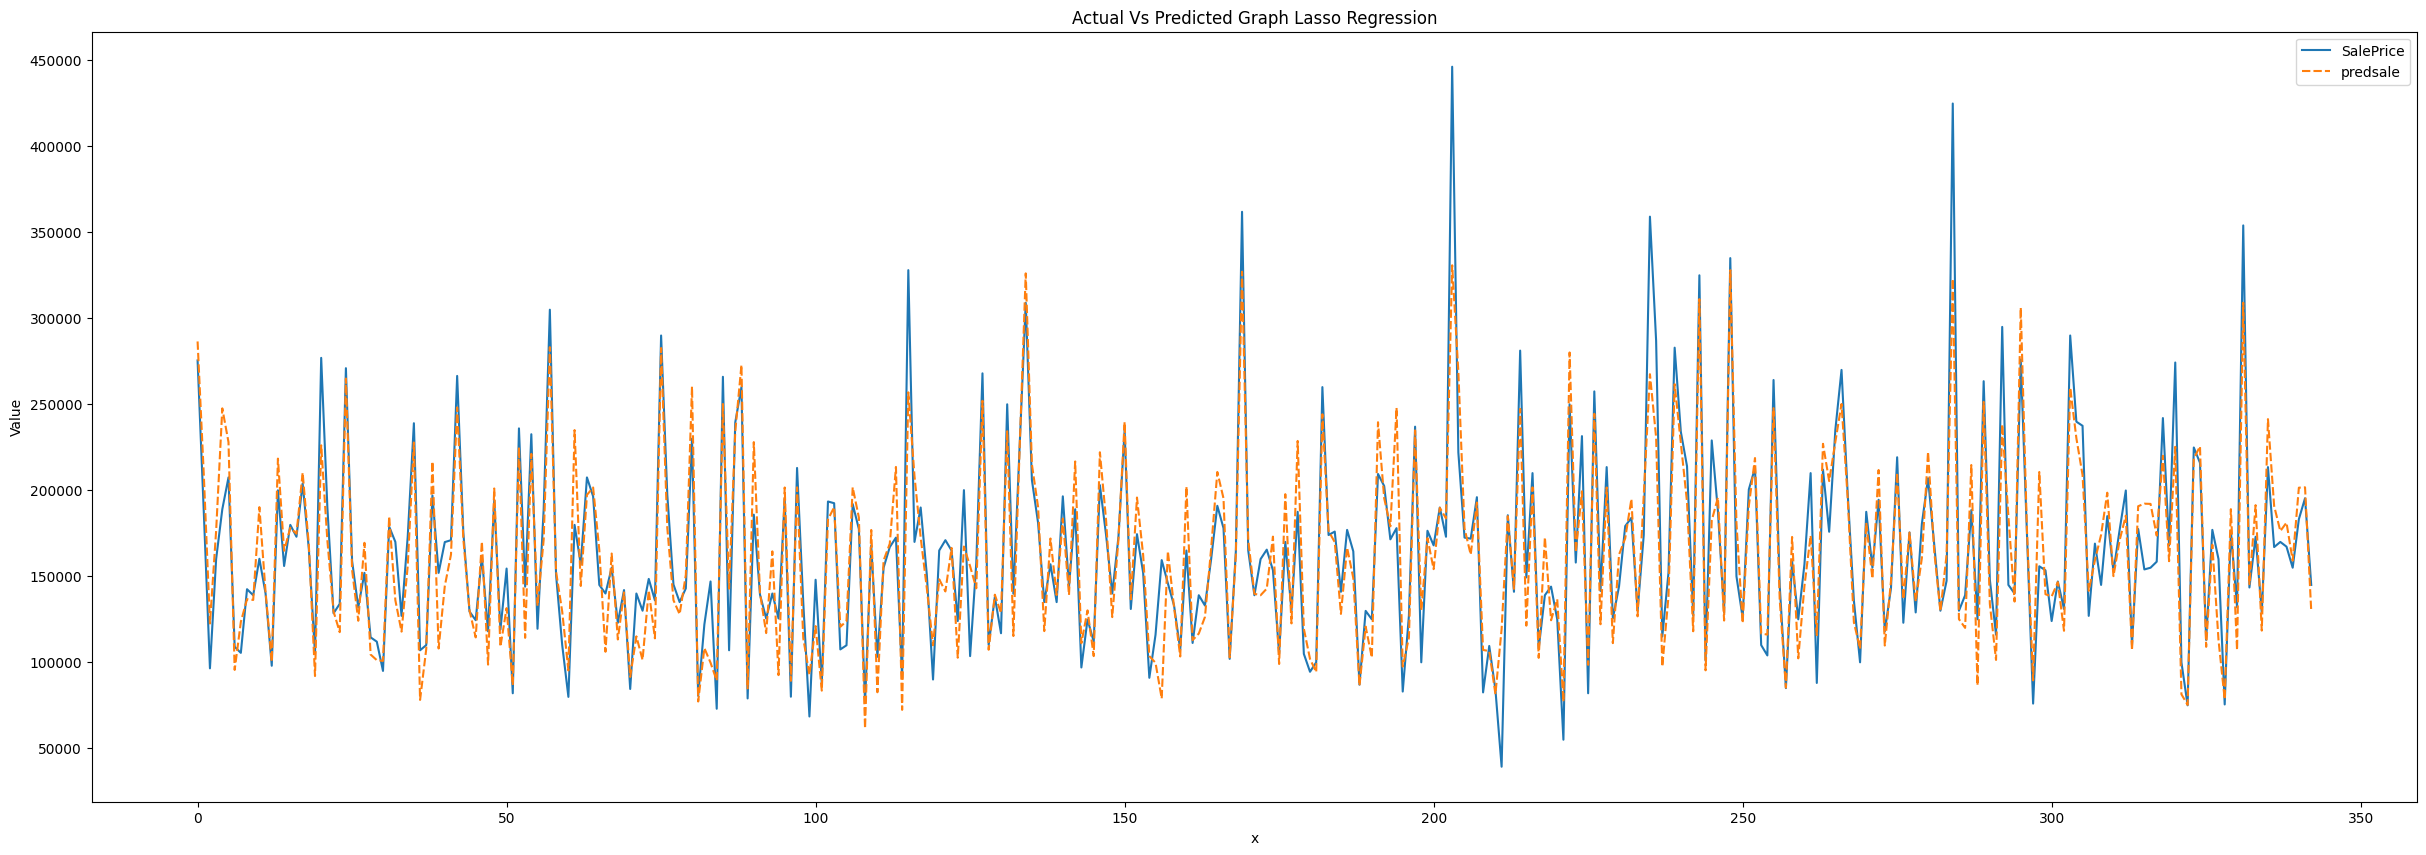

In [917]:
# Plot Graph between actual and predicted
plt.figure(figsize = [30, 10])
sns.lineplot(data=final[['SalePrice', 'predsale']])
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Actual Vs Predicted Graph Lasso Regression')
plt.show()

In [918]:
# # VIF
# df = add_constant(X)

In [919]:
# vif = pd.DataFrame()
# vif["Feature"] = df.columns
# vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]


In [920]:
# print(vif)


In [921]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.340220e-01,8.737534e-01,8.786931e-01
1,R2 Score (Test),9.092163e-01,8.480372e-01,8.488213e-01
2,RSS (Train),1.627417e+11,3.114004e+11,2.992161e+11
3,RSS (Test),1.085865e+11,1.817627e+11,1.808249e+11
4,MSE (Train),1.427171e+04,1.974178e+04,1.935170e+04
5,MSE (Test),1.779266e+04,2.302000e+04,2.296054e+04


In [922]:
# Lets observe the results

In [923]:
print("USING Linear REGRESSION : ")
print("We got the good r2 score for testing and training is 93.4% and 90.9% ")
print("We will go ahead and use this model")


USING Linear REGRESSION : 
We got the good r2 score for testing and training is 93.4% and 90.9% 
We will go ahead and use this model
